In [1]:
# Installing Dependencies

!pip install pycountry_convert
!pip install folium
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
!pip install keras
!pip install tensorflow
!pip install --upgrade pip

--2020-04-02 03:39:29--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [application/octet-stream]
Saving to: ‘model_deaths.h5’

model_deaths.h5     100%[===================>] 108.41K  --.-KB/s    in 0.003s  

2020-04-02 03:39:29 (31.5 MB/s) - ‘model_deaths.h5’ saved [111008/111008]

--2020-04-02 03:39:29--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [applica

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.0.2)


In [2]:
#!pip install tensorflow
!conda install tensorflow --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
!pip install imgkit

In [4]:
!pip install wkhtmltopdf

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime,timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
from pandas.plotting import table

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop,Adam
import imgkit


%matplotlib inline

Using TensorFlow backend.


In [6]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [7]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['Country/Region'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['Country/Region'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['Country_Region'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"
# df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"


df_confirmed.loc[df_confirmed['Country/Region'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['Country/Region'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['Country_Region'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
# df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['Country/Region'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['Country/Region'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['Country_Region'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
# df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['Country/Region'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['Country/Region'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['Country_Region'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
# df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['Country/Region'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['Country/Region'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['Country_Region'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
# df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['Country/Region'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['Country/Region'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['Country_Region'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['Country/Region'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['Country/Region'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['Country_Region'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
# df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['Country/Region'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['Country/Region'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['Country_Region'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
# df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["Country/Region"])
countries1 = np.asarray(df_covid19["Country_Region"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [8]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_confirmed = df_confirmed.drop(['Province/State','country'],axis=1)
df_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [9]:

df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_deaths = df_deaths.drop(['Province/State','country'],axis=1)
df_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,1,2,4,4,4,4,4,4,4
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,4,5,5,6,8,10,10,11,15,15
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,17,19,21,25,26,29,31,35,44,58
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,1,3,3,3,6,8,12,14
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [10]:
df_recovered = df_recovered.replace(np.nan, '', regex=True)
df_recovered = df_recovered.drop(['Province/State'],axis=1)
df_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [11]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,2020-04-02 03:33:56,-25.0000,133.0000,4862,20,422,4420
1,Austria,2020-04-02 03:27:55,47.5162,14.5501,10711,146,1436,9129
2,Canada,2020-04-02 03:33:42,60.0010,-95.0010,9731,112,1435,0
3,China,2020-04-02 02:23:37,30.5928,114.3055,82394,3316,76426,2652
4,Denmark,2020-04-02 03:27:55,56.0000,10.0000,3290,104,971,2215


In [12]:
df_table = df_table.replace(np.nan, '', regex=True)
df_table.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered
0,Afghanistan,2020-01-22,0,0,,,0,
1,Afghanistan,2020-01-23,0,0,,,0,
2,Afghanistan,2020-01-24,0,0,,,0,
3,Afghanistan,2020-01-25,0,0,,,0,
4,Afghanistan,2020-01-26,0,0,,,0,


In [13]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis=1)

In [14]:
df_countries_cases.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Australia,4862,20,422,4420
1,Austria,10711,146,1436,9129
2,Canada,9731,112,1435,0
3,China,82394,3316,76426,2652
4,Denmark,3290,104,971,2215


In [15]:
df_countries_cases.index = df_countries_cases['Country_Region']
df_countries_cases = df_countries_cases.drop(['Country_Region'],axis=1)
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,4862,20,422,4420
Austria,10711,146,1436,9129
Canada,9731,112,1435,0
China,82394,3316,76426,2652
Denmark,3290,104,971,2215


In [16]:
df_countries_cases = df_countries_cases.groupby(['Country_Region']).sum()

In [17]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='prism',axis=1)

,Confirmed,Deaths,Recovered,Active
0,937170,47235,193770,485178


In [18]:
df_countries = df_countries_cases.sort_values('Confirmed',ascending=False).style.background_gradient(cmap='prism')

In [19]:
df_countries.to_excel('World_COVID19_data.xlsx',engine='openpyxl')

In [20]:
df_countries_cases.sort_values('Confirmed',ascending=False).style.background_gradient(cmap='prism')

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,216515,5119,8593,0
Italy,110574,13155,16847,80572
Spain,104118,9387,22647,72084
China,82394,3316,76426,2652
Germany,77981,931,18700,58350
France,57763,4043,11055,42665
Iran,47593,3036,15473,29084
United Kingdom,29865,2357,179,27329
Switzerland,17768,488,2967,14313


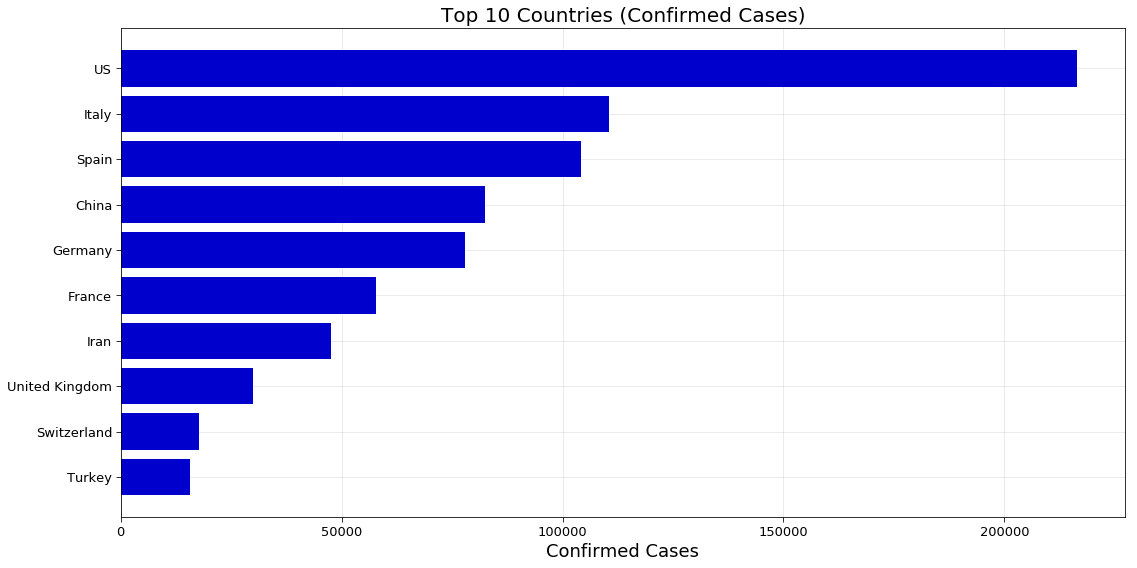

In [21]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

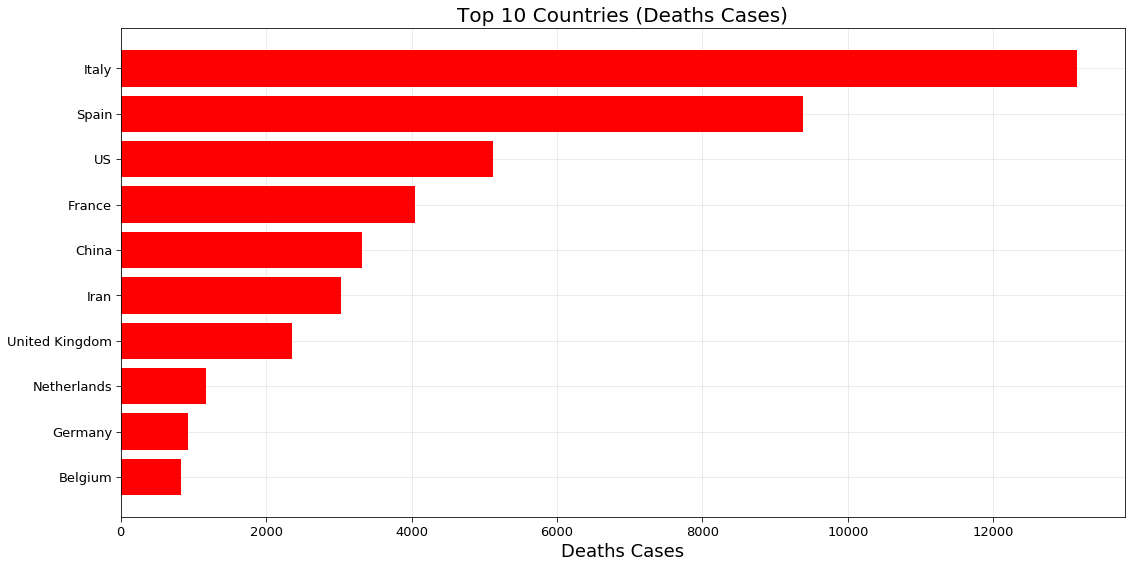

In [22]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

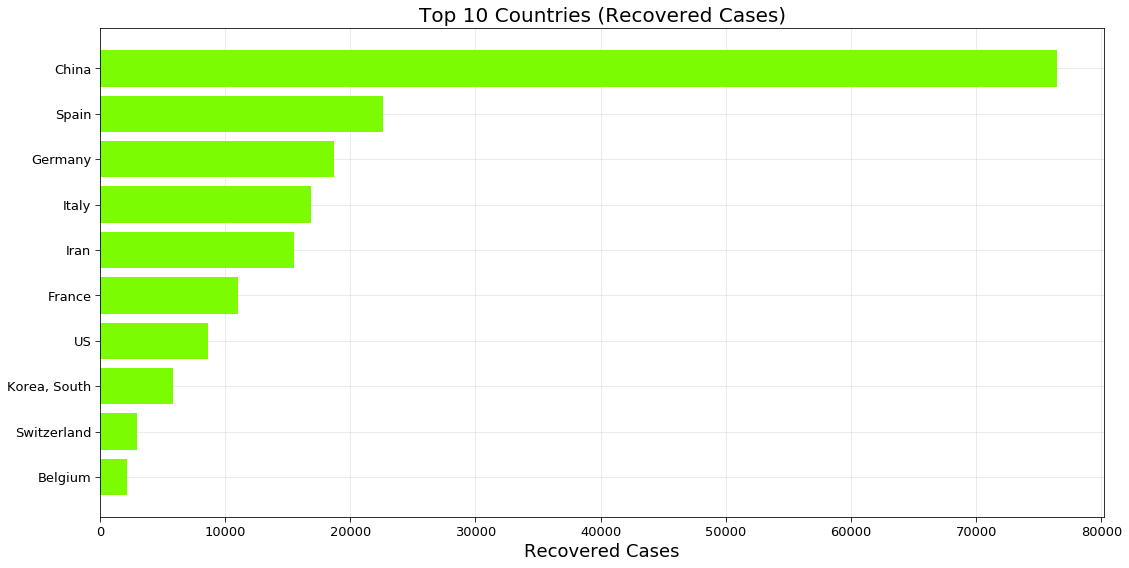

In [23]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Recovered Cases).png')

In [24]:
df_countries_cases.corr().style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Recovered,Active
Confirmed,1,0.788441,0.575997,0.619812
Deaths,0.788441,1,0.521129,0.842194
Recovered,0.575997,0.521129,1,0.41707
Active,0.619812,0.842194,0.41707,1


In [25]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [26]:
df_countries = df_confirmed.groupby(['Country/Region']).sum()

In [27]:
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)

In [28]:
countries = df_countries[df_countries[df_countries.columns[-1]] >= 1000].index

In [29]:
countries

Index(['US', 'Italy', 'Spain', 'China', 'Germany', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Turkey', 'Belgium', 'Netherlands',
       'Austria', 'Korea, South', 'Canada', 'Portugal', 'Brazil', 'Israel',
       'Sweden', 'Norway', 'Australia', 'Czechia', 'Ireland', 'Denmark',
       'Chile', 'Malaysia', 'Russia', 'Ecuador', 'Poland', 'Romania',
       'Luxembourg', 'Philippines', 'Japan', 'Pakistan', 'India', 'Thailand',
       'Saudi Arabia', 'Indonesia', 'Finland', 'Greece', 'South Africa',
       'Peru', 'Dominican Republic', 'Iceland', 'Mexico', 'Panama', 'Colombia',
       'Serbia', 'Argentina', 'Singapore'],
      dtype='object', name='Country/Region')

In [30]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["Country/Region",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

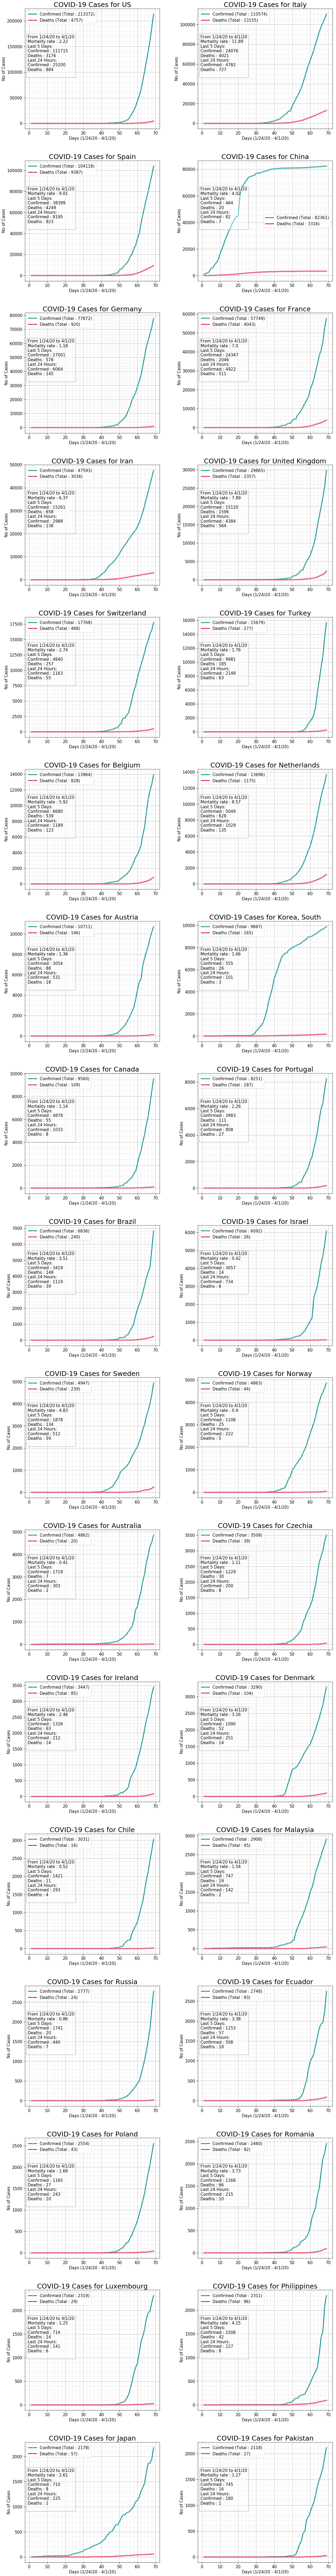

<Figure size 432x288 with 0 Axes>

In [31]:
df_countries = df_countries.groupby(['Country/Region']).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)
countries = df_countries[df_countries[df_countries.columns[-1]]>=2000].index
cols = 2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed,df_deaths,country=country,figure=[f,rows,cols,i+1])
    
plt.show()

plt.savefig("Top 25 countries latest trends")

COVID INDIA

In [32]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()

In [33]:
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [34]:
df_india = df_india.sort_values('confirmed',ascending=False)
df_india = df_india[['confirmed','active','recovered','deaths']]

In [35]:
total = df_india.sum()
total.name = "Total"

pd.DataFrame(total).transpose().style.background_gradient(cmap='prism',axis=1).to_excel('India_COVID19_totalData.xlsx',engine='openpyxl')

In [36]:
df_india.head()

,confirmed,active,recovered,deaths
state,,,,
Maharashtra,335,282,39,14
Kerala,265,237,26,2
Tamil Nadu,234,227,6,1
Delhi,152,144,6,2
Rajasthan,120,117,3,0


In [37]:
df_india_styled = df_india.style.background_gradient('prism')


In [38]:
df_india_styled.to_excel('India_COVID19_data.xlsx',engine='openpyxl')

In [39]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]

In [40]:
url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
state_json = requests.get(url).json()
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['deaths']/(df_india.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

In [41]:
df_india.drop(['Lat','Long'],axis=1,inplace=True)
df_india

,confirmed,active,recovered,deaths
state,,,,
Maharashtra,335,282,39,14
Kerala,265,237,26,2
Tamil Nadu,234,227,6,1
Delhi,152,144,6,2
Rajasthan,120,117,3,0
Uttar Pradesh,117,98,17,2
Andhra Pradesh,111,109,2,0
Karnataka,110,98,9,3
Telangana,97,77,14,6


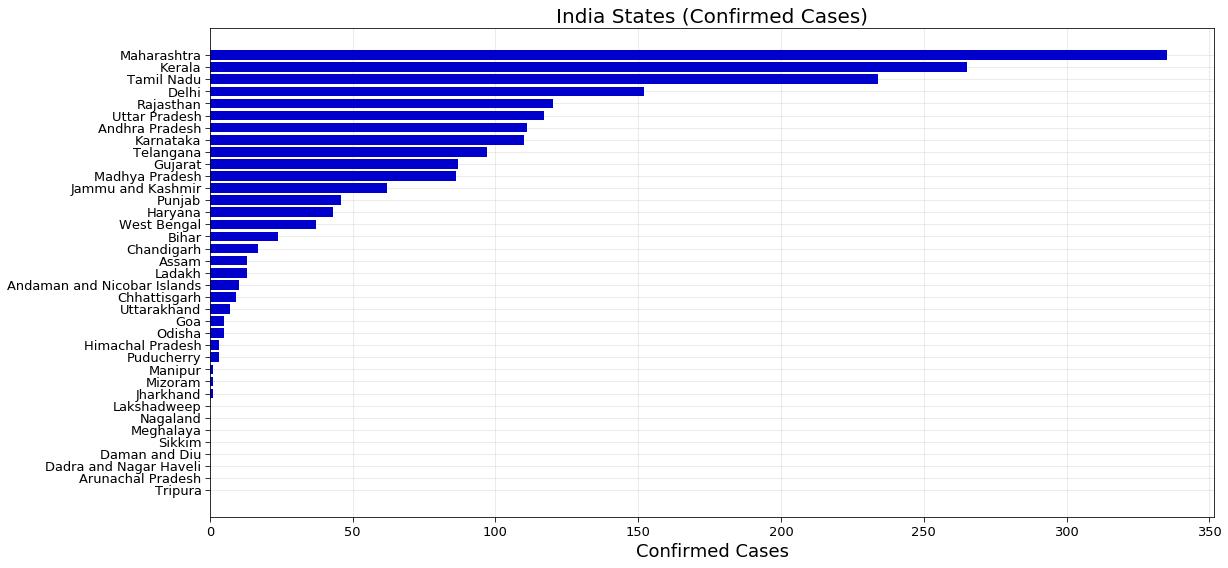

In [42]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[:],df_india.sort_values('confirmed')["confirmed"].values[:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("India States (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Confirmed Cases).png')

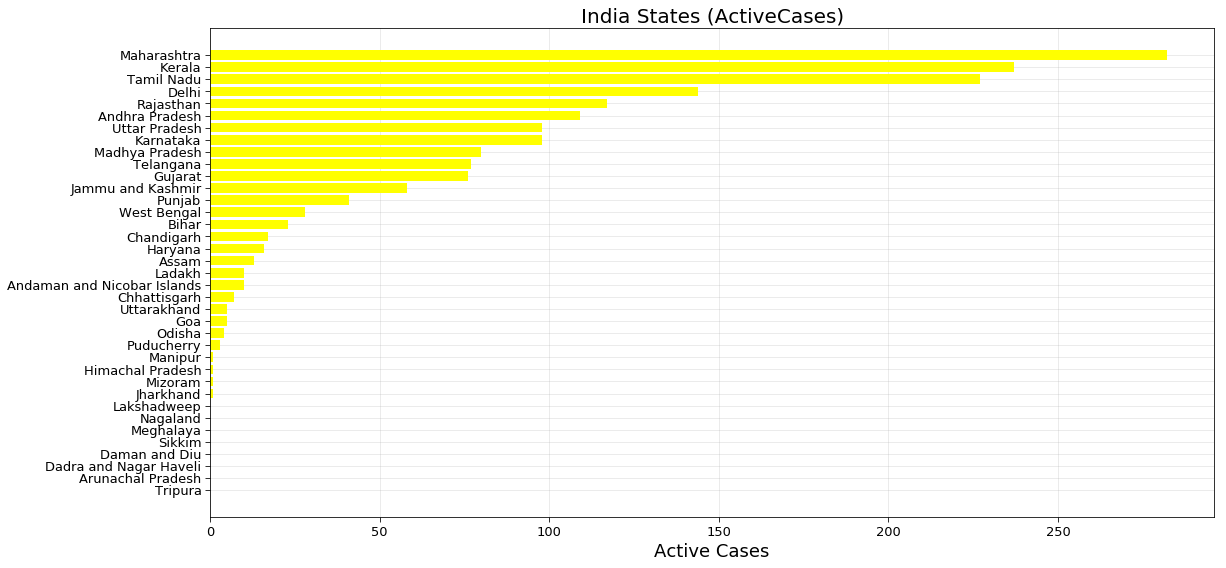

In [43]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('active')["active"].index[:],df_india.sort_values('active')["active"].values[:],color="yellow")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("India States (ActiveCases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Active Cases).png')

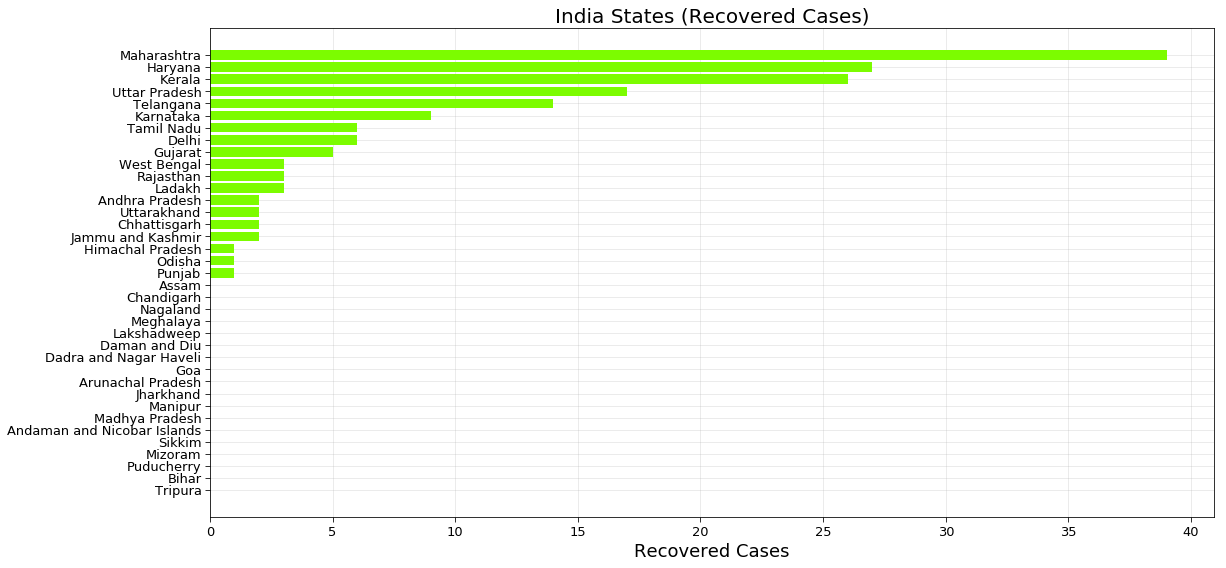

In [44]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('recovered')["recovered"].index[:],df_india.sort_values('recovered')["recovered"].values[:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("India States (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Recovered Cases).png')

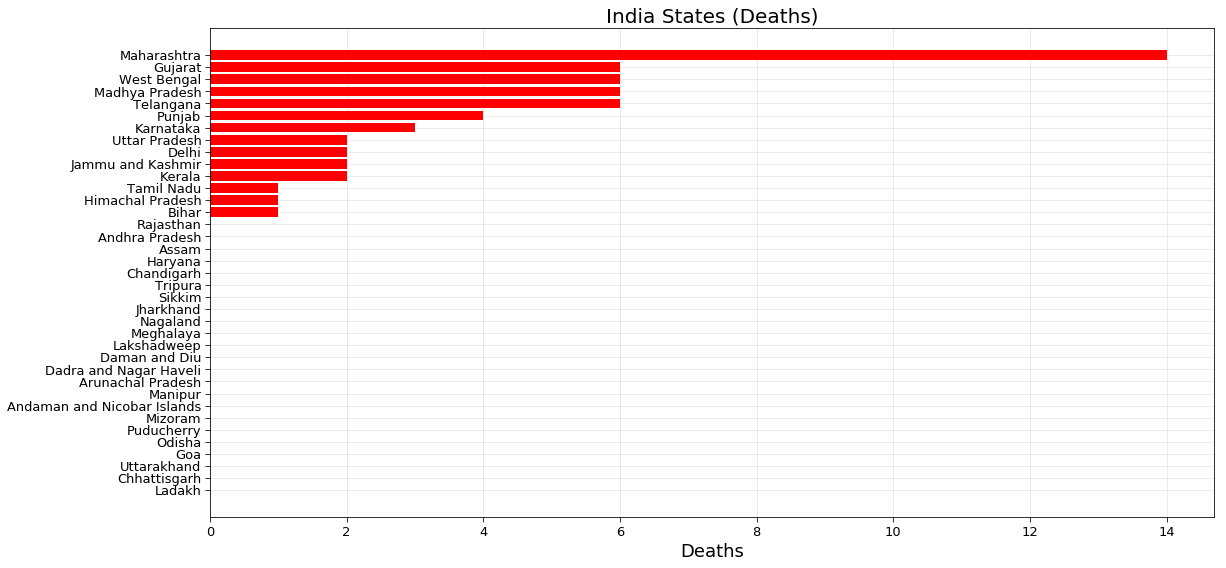

In [45]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[:],df_india.sort_values('deaths')["deaths"].values[:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("India States (Deaths)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Deaths).png')


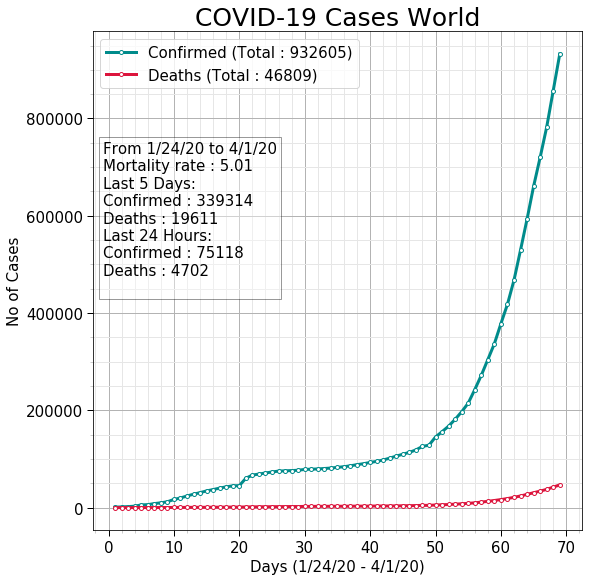

In [46]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(df_confirmed, df_deaths,country = "All",figure = [f,rows,cols, 1])

plt.savefig('COIVD-19-World.png')
plt.show()

In [47]:
df_india_styled = df_india.style.background_gradient('prism')

In [48]:

df_india_styled.to_excel('India_COVID19_data.xlsx',engine='openpyxl')

In [49]:
df_india_styled

,confirmed,active,recovered,deaths
state,,,,
Maharashtra,335,282,39,14
Kerala,265,237,26,2
Tamil Nadu,234,227,6,1
Delhi,152,144,6,2
Rajasthan,120,117,3,0
Uttar Pradesh,117,98,17,2
Andhra Pradesh,111,109,2,0
Karnataka,110,98,9,3
Telangana,97,77,14,6


In [50]:
pd.DataFrame(df_india.sum()).transpose().style.background_gradient(cmap='prism',axis=1)

,confirmed,active,recovered,deaths
0,2014,1789,169,56


In [51]:
df_india_total = pd.DataFrame(df_india.sum()).transpose().style.background_gradient(cmap='prism',axis=1) 

In [52]:
df_india_total

,confirmed,active,recovered,deaths
0,2014,1789,169,56


In [53]:
df_india_total.to_excel('INDIA_TOTAL_COVID19_data.xlsx',engine='openpyxl')

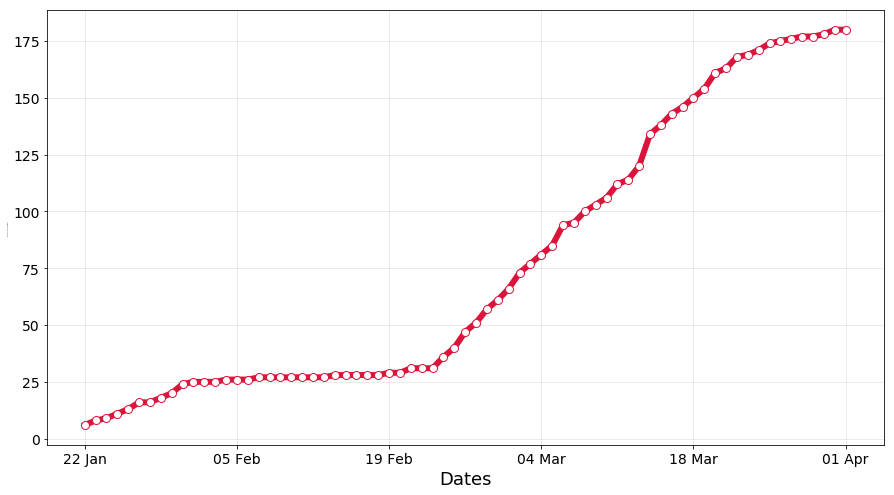

In [54]:
case_nums_country = df_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

plt.savefig('spread.png')
plt.show()
plt.close()

In [55]:
model = models.load_model('model_confirmed.h5')

In [56]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0  

In [57]:
data_y = np.log10(np.asarray(df_confirmed.sum()[5:]).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

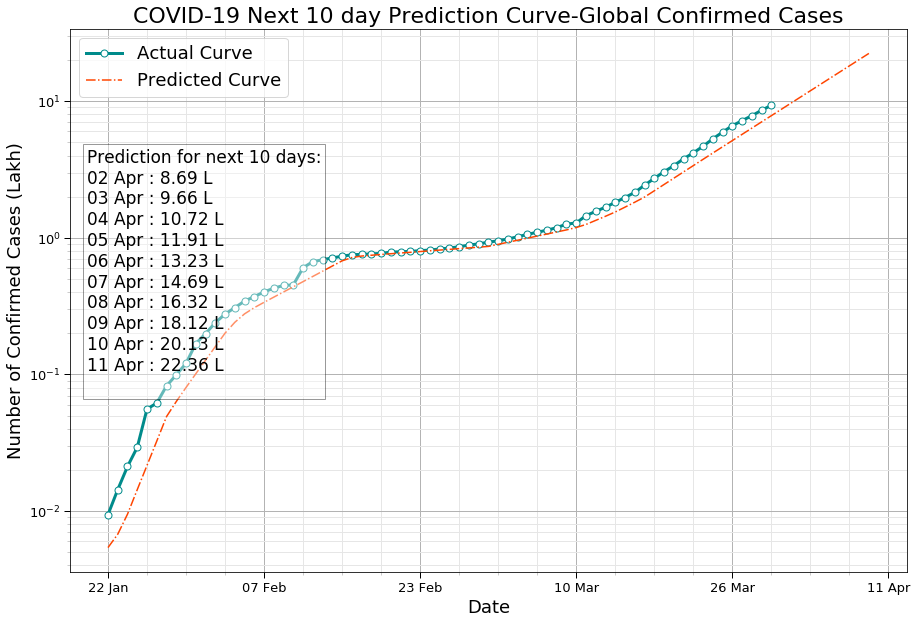

In [58]:
lakh = 100000
prediction_days = 10
data = np.power(10,model.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig("Prediction Curve-Confirmed.png")
plt.show()
